# K-means clustering

## import library

In [224]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [225]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

In [4]:
number_feature

2

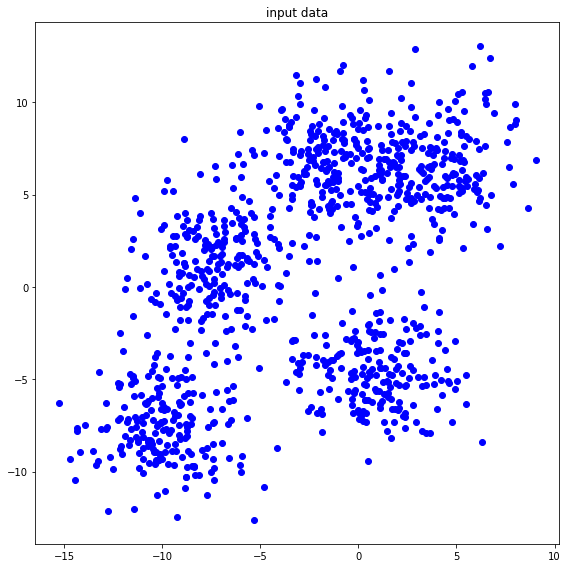

In [180]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.plot(x, y, 'o', color = "blue")

plt.tight_layout()
plt.show()

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [18]:
feature.shape
a = np.arange(1, 27).reshape(13, 2)
b = np.array([1, 1])

In [66]:
test_dist = compute_distance(feature, np.array([1, 2]))
test_min = np.min(test_dist, axis = 0)
feature[np.array(test_dist == test_min).flatten()].shape
# print(np.sqrt(pow(x[100] - 1, 2) + pow(y[100] - 2, 2)))

(1, 2)

In [15]:
matrix = np.arange(9).reshape(3,3)
print(matrix)
print(np.diag(matrix))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[0 4 8]


In [4]:
# centroid 와 feature간의 distance를 구하게 되는 것. 
# dimension을 잘 확인할 것.
# center는 한개의 feature point로부터 모든 point와의 거리를 출력
def compute_distance(feature, center):
    num_data = feature.shape[0]
    residual = feature - center 
    # n * 2 (feature: 2)
    residual_pow = np.dot(residual, residual.T)
    # n * n
    distance = np.diag(residual_pow).reshape(num_data, 1)
    distance = np.sqrt(distance)
    return distance

## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [40]:
k = np.array([1, 2, 2, 2, 4]).reshape(5, 1)
p = np.array(2)
bool_array = np.array(k == p)
x = np.array([[10, 20, 30, 40, 50], [20, 30 ,40, 51, 10]]).reshape(5, 2)
print(bool_array)
print(x)
min_val = np.min(x, axis = 1)
print(min_val.reshape(5, 1))
y = np.array(x == min_val.reshape(5, 1))
print(y)
np.dot(y, [[1], [2]])


[[False]
 [ True]
 [ True]
 [ True]
 [False]]
[[10 20]
 [30 40]
 [50 20]
 [30 40]
 [51 10]]
[[10]
 [30]
 [20]
 [30]
 [10]]
[[ True False]
 [ True False]
 [False  True]
 [ True False]
 [False  True]]


array([[1],
       [1],
       [2],
       [1],
       [2]])

In [5]:
# feature => 모든 feature들
# label_feature => 각각의 feature point가 가지고 잇는 feature들의 label (l function)
# value_label => label들 중에서 특정한 하나의 label (k개의 cluster라고 하면, 0부터 k-1까지 중에서의 하나의 값)
# 그떄의 centroid를 구하는 것이 이 함수의 역할
# 뮤 함수
def compute_centroid(feature, label_feature, value_label):
    bool_label = np.array(label_feature == value_label).flatten()
    sect_feature = np.array(feature[bool_label])
    mean_feature = np.mean(sect_feature, axis = 0)
    
    distance = compute_distance(sect_feature, mean_feature)
    
    min_dist = np.min(distance, axis = 0)
    bool_min_dist = np.array(distance == min_dist).flatten()
    
    centroid = sect_feature[bool_min_dist]
    
#     return sum_feature
    return centroid

In [80]:
def loss_function(feature, label_feature, value_label, centroid):
    bool_label = np.array(label_feature == value_label).flatten()
    sect_feature = np.array(feature[bool_label])

    distance = compute_distance(sect_feature, centroid)
    loss = np.sum(distance, axis = 0)
    return loss    

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [42]:
# k개의 label을 가지는 각각의 feature point에 대해서 
def compute_label(distance):
    num_data = distance.shape[0]
    num_cluster = distance.shape[1]
    # distance -> n * k (각 centroid로부터의 거리)
    min_val = np.min(distance, axis = 1).reshape(num_data, 1)
    bool_min = np.array(distance == min_val)
    
    label_multiplier = np.arange(1, num_cluster + 1).reshape(num_cluster, 1)
    
    index_label_feature = np.dot(bool_min, label_multiplier)
    
    return index_label_feature


In [207]:
# ===================================================
# assign the number of clusters and iterations
number_cluster      = 10
number_iteration    = 15
# ===================================================

In [43]:
# 각각의 poinnt에 대해서 임의의 label을 주는 것으로 initialize하면 됨. 

In [48]:
np.random.randint(1, 11, (1, 10))


array([[ 4,  7,  0,  9,  7,  4,  3,  4,  9, 10]])

In [208]:
distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))
loss_iteration      = np.zeros(shape=(number_iteration, 1))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))
label_feature = np.random.randint(1, number_cluster + 1, (number_data, 1))
 # initalization

In [209]:
for i in range(number_iteration):
    loss = 0
    for k in range(number_cluster):
        centroid[k] = compute_centroid(feature, label_feature, k + 1)
        distance[:, k : k + 1] = compute_distance(feature, centroid[k])
        loss_cluster = loss_function(feature, label_feature, k + 1, centroid[k])
        loss += loss_cluster
        
    label_feature = compute_label(distance)
    
    loss_iteration[i] = loss / number_data
    centroid_iteration[i] = centroid
    print("[%4d], loss = %5.5f" % (i, loss_iteration[i]))

[   0], loss = 7.73708
[   1], loss = 2.95574
[   2], loss = 2.23205
[   3], loss = 2.10640
[   4], loss = 2.01810
[   5], loss = 1.99150
[   6], loss = 1.99614
[   7], loss = 1.99166
[   8], loss = 1.99064
[   9], loss = 1.99064
[  10], loss = 1.99064
[  11], loss = 1.99064
[  12], loss = 1.99064
[  13], loss = 1.99064
[  14], loss = 1.99064


## plot the results

In [210]:
def plot_data(feature):
    
    plt.figure(figsize=(8,8))   
    plt.title('input data')
    plot_color = "blue"
    plt.plot(x, y, 'o', color = plot_color)

    plt.tight_layout()
    plt.show()

In [211]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
    
    plt.plot(loss_iteration, color = "red")
    
    plt.tight_layout()
    plt.show()

In [212]:
centroid_iteration[:, 0, 1]

array([1.65322598, 7.16428827, 7.38393679, 7.4998763 , 7.94461834,
       7.94461834, 7.94461834, 7.94461834, 7.94461834, 7.94461834,
       7.94461834, 7.94461834, 7.94461834, 7.94461834, 7.94461834])

In [219]:
def plot_centroid(centroid_iteration):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    
    for i in range(number_cluster):
        plt.plot(centroid_iteration[:, i, 0], centroid_iteration[:, i, 1], label = "cluster {}".format(i + 1))
        plt.plot(centroid_iteration[0, i, 0], centroid_iteration[0, i, 1], 'o', color = "blue")
        plt.plot(centroid_iteration[number_iteration - 1, i, 0], centroid_iteration[number_iteration - 1, i, 1], 's', color = "red")
    
    plt.legend()
    plt.tight_layout()
    plt.show()

In [220]:
def plot_cluster(feature, label_feature):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')

    for i in range(number_cluster):
        cluster_value = i + 1
        bool_feature = np.array(label_feature == cluster_value).flatten()
        sect_feature = np.array(feature[bool_feature])
        plt.plot(sect_feature[:, 0], sect_feature[:, 1], 'o', label = "cluster {}".format(i + 1))
        

    plt.legend()
    plt.tight_layout()
    plt.show()


***

# results

***

1. plot the input data

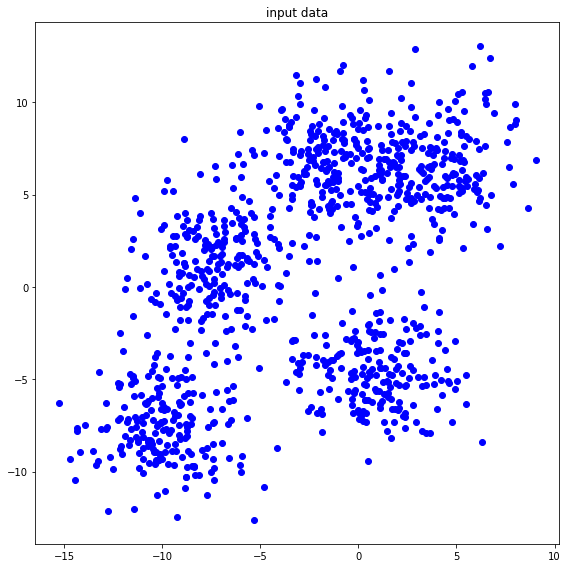

In [181]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

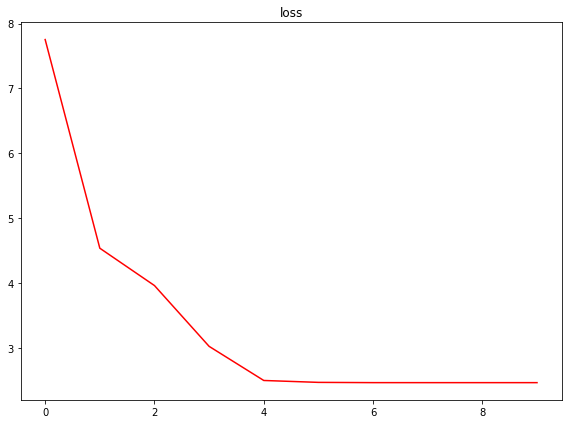

In [112]:
plot_loss_curve(loss_iteration)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

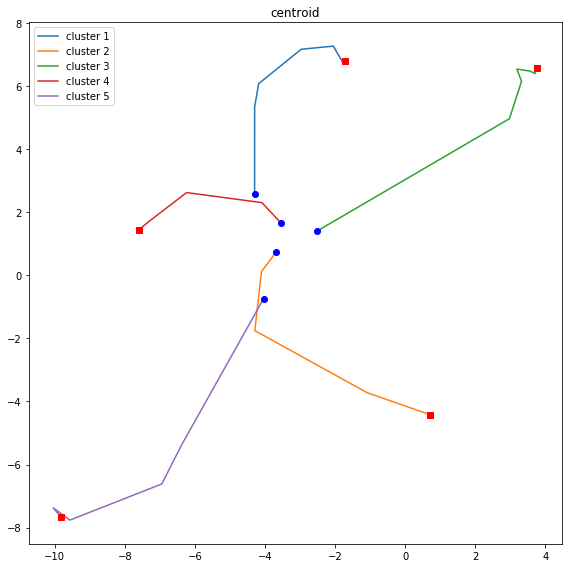

In [182]:
plot_centroid(centroid_iteration)
# centroid가 initial에서 optimal까지 어떻게 움직이는지 

***

4. plot the final clustering result with the number of clusters being 5

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

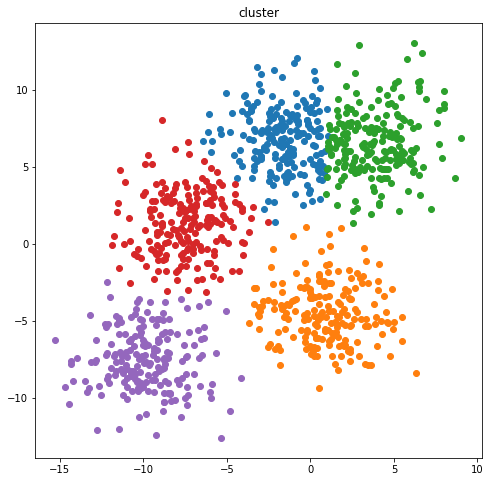

In [196]:
plot_cluster(feature, label_feature)

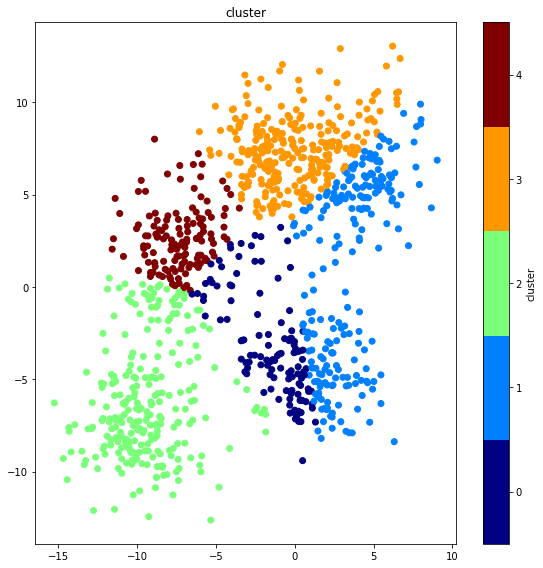

***

5. plot the loss over the iterations with the number of clusters being 10

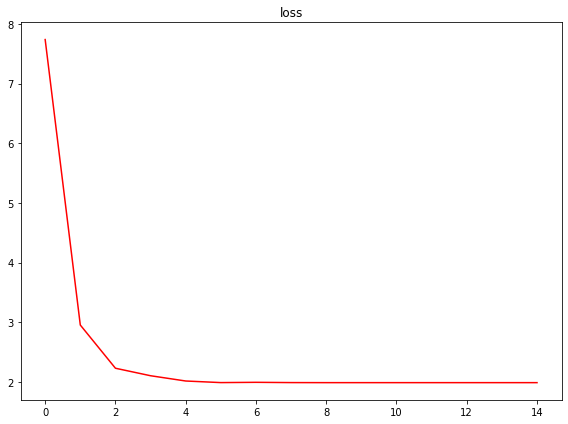

In [221]:
plot_loss_curve(loss_iteration)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

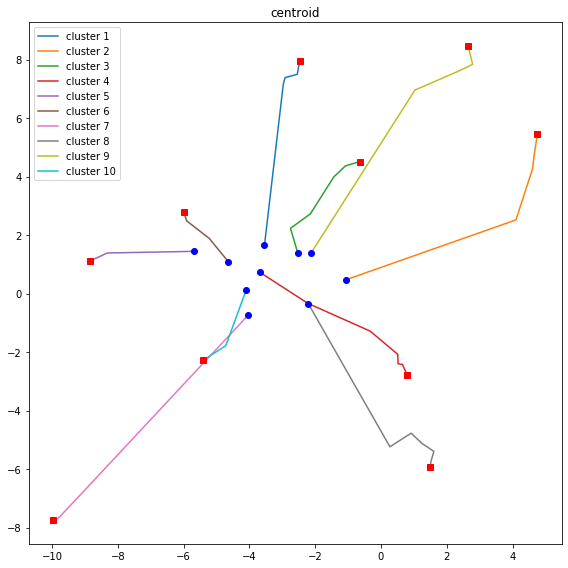

In [222]:
plot_centroid(centroid_iteration)
# 어떤 주어진 centroid로부터 가까운 점이 하나도 없다고 하면 -> 그러한 centroid는 이전과 동일하게 유지하도록 programming하면 됨.

***

7. plot the final clustering result with the number of clusters being 10

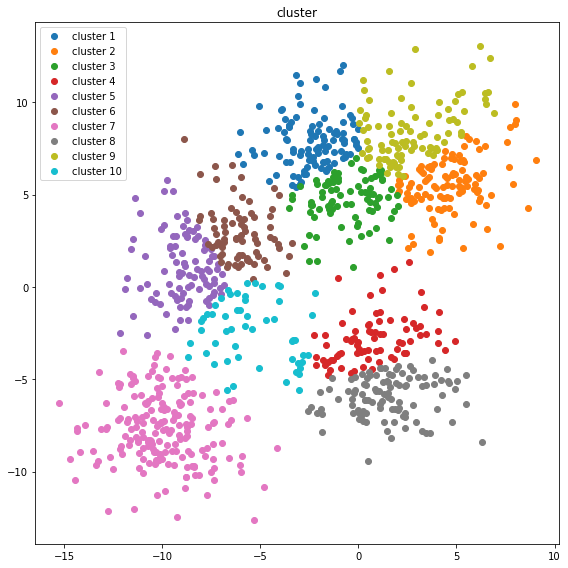

In [223]:
plot_cluster(feature, label_feature)

***